In [1]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
from Funciones import * 

In [2]:
ruta_base  = os.path.dirname(os.path.abspath('./')) + '/'
ruta_datos = ruta_base + 'Datos/'
ruta_shp   = ruta_datos+ 'Shapefiles/'

### Series de precipitación

In [3]:
ruta_ppt = ruta_datos + 'Originales/PPT/'
ppt = pd.read_csv(ruta_ppt+'DF_PPT.csv', index_col=0)
ppt.index = pd.DatetimeIndex(ppt.index)

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

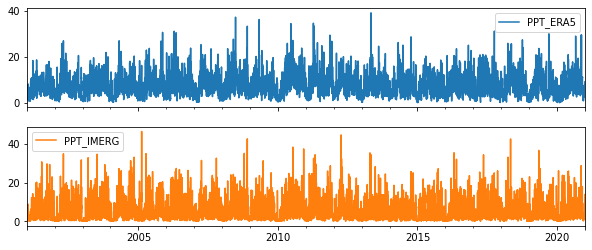

In [4]:
ppt.plot(subplots=True, figsize=(10,4))

array([[<AxesSubplot:xlabel='PPT_ERA5', ylabel='PPT_ERA5'>,
        <AxesSubplot:xlabel='PPT_IMERG', ylabel='PPT_ERA5'>],
       [<AxesSubplot:xlabel='PPT_ERA5', ylabel='PPT_IMERG'>,
        <AxesSubplot:xlabel='PPT_IMERG', ylabel='PPT_IMERG'>]],
      dtype=object)

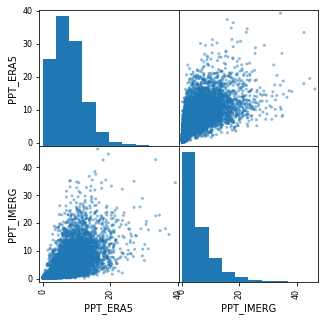

In [5]:
pd.plotting.scatter_matrix(ppt, figsize=(5,5))

In [6]:
ppt.corr()

,PPT_ERA5,PPT_IMERG
PPT_ERA5,1.00000,0.57898
PPT_IMERG,0.57898,1.00000


### Caudal

In [7]:
ruta_caudal = ruta_datos + 'Originales/Caudal/'
files = glob.glob(ruta_caudal+'*.csv')

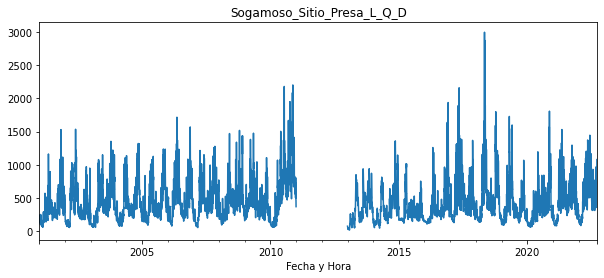

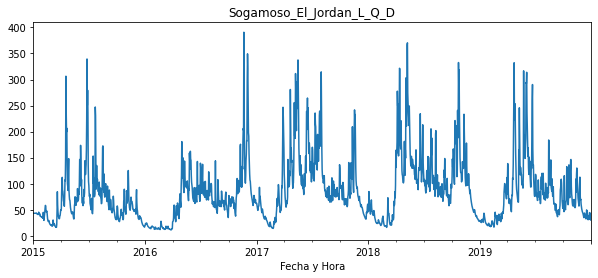

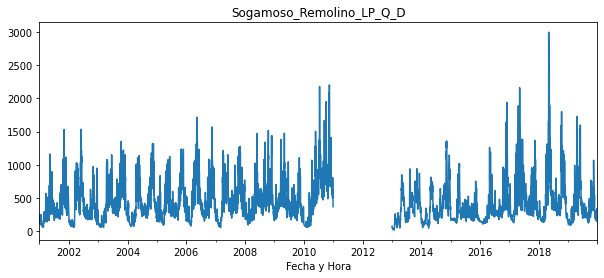

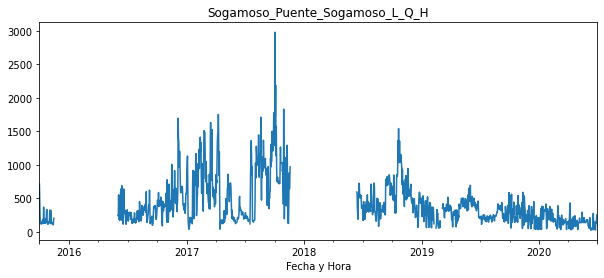

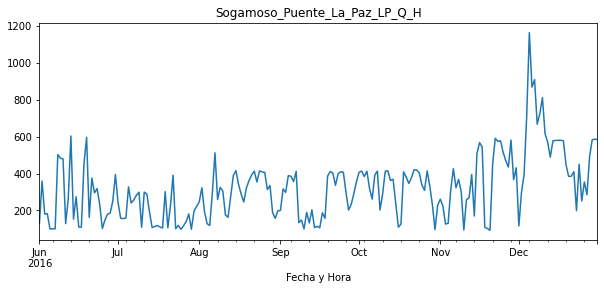

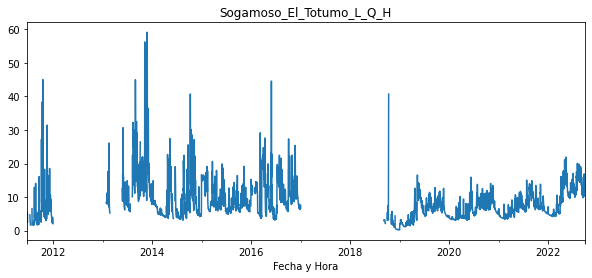

In [8]:
names_caudales = []
data_caudales  = []
# Tablazo el el de sitio de presa en un principio
for file in files:
    name = file.split('/')[-1].split('.')[0]
    names_caudales.append(name)
    serie = pd.read_csv(file, index_col=0)
    serie = serie['Valor'][serie['Unnamed: 2']==51.0]
    serie.index = pd.DatetimeIndex(serie.index)
    serie = serie.resample('d').mean()['2001':]
    data_caudales.append(serie.values)
    plt.figure(figsize=(10,4))
    serie.plot()
    plt.title(name)
    plt.show()
    plt.close('all')   
    
    

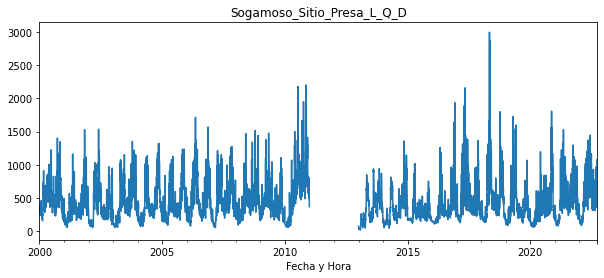

In [9]:
# Tablazo el el de sitio de presa en un principio

file = files[0]
name = file.split('/')[-1].split('.')[0]
serie = pd.read_csv(file, index_col=0)
serie = serie['Valor'][serie['Unnamed: 2']==51.0]
serie.index = pd.DatetimeIndex(serie.index)
serie = serie.resample('d').mean()['2000':]
plt.figure(figsize=(10,4))
serie.plot()
plt.title(name)
plt.show()
plt.close('all') 

In [10]:
caudal = pd.DataFrame(index = serie.index.values, data=serie.values, columns=['Caudal'])

### Series de ondas

In [11]:
ruta_ondas = ruta_datos + 'Originales/Ondas/'
files = glob.glob(ruta_ondas+'*')

In [12]:
names_ondas = []
data_ondas  = []

region = [(-76,8),(-70,8),(-70,3),(-78,3)]
for file in files:

    name   = file.split('/')[-1].split('.')[0].split('_')[0]
    data   = xr.open_dataset(file)
    lat    = np.array(data['lat'])
    lon    = np.array(data['lon'])
    time   = pd.DatetimeIndex(np.array(data['time']))
    data_s = np.array(data['olr_s'])
    data_a = np.array(data['olr_a'])

    for data_i, i in zip([data_s, data_a],['s','a']):
        names_ondas.append(name+'_'+i)
        data_ondas.append(Serie_Cuenca_P(Polygon_Generator(region,[]), Data=data_i, Latitudes=lat, Longitudes=lon, Fechas=time).values)

fechas = pd.DatetimeIndex(Serie_Cuenca_P(Polygon_Generator(region,[]), Data=data_i, Latitudes=lat, Longitudes=lon, Fechas=time).index)

ondas = pd.DataFrame(index=fechas, data = np.array(data_ondas).T, columns=names_ondas)

/mnt/g/My Drive/Maestría en Recursos Hidraulicos/IA y AU en geociencias/Trabajo/Scripts/Funciones.py:62: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(cut_data, axis=1)


In [13]:
ondas.drop(columns = ['EIG_s','MRG_s','WIG_a','TD_a','ER_a','Kelvin_a'], inplace=True)

In [14]:
ondas

,EIG_a,ER_s,Kelvin_s,MJO_s,MJO_a,MRG_a,TD_s,WIG_s
2001-02-02,3.472839,-2.538527,4.060272,-4.581935,-0.699003,1.043384,-4.896246,3.619513
2001-02-03,-0.933801,-1.033567,-1.525076,-4.702835,-0.704193,-2.067537,0.859960,-3.188267
2001-02-04,-2.512747,0.587908,-4.572494,-4.697544,-0.693261,-1.375889,3.592543,2.471776
2001-02-05,2.848997,1.901652,-4.984876,-4.565582,-0.665588,3.258563,-2.351354,-1.794038
2001-02-06,-1.166517,2.592392,-2.904190,-4.310416,-0.621030,3.303734,0.447085,1.261962
...,...,...,...,...,...,...,...,...
2020-11-16,-0.807936,5.253497,-10.202110,1.540721,-0.178269,-1.041809,1.241732,-2.408803
2020-11-17,1.727120,7.120134,-14.783565,1.128295,-0.022558,-1.260204,4.980706,2.914153
2020-11-18,-2.296233,7.695562,1.356259,0.699870,0.127739,0.155920,0.336406,-2.658446
2020-11-19,-4.791578,7.079211,11.807167,0.269720,0.268386,1.982399,0.526290,1.975691


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

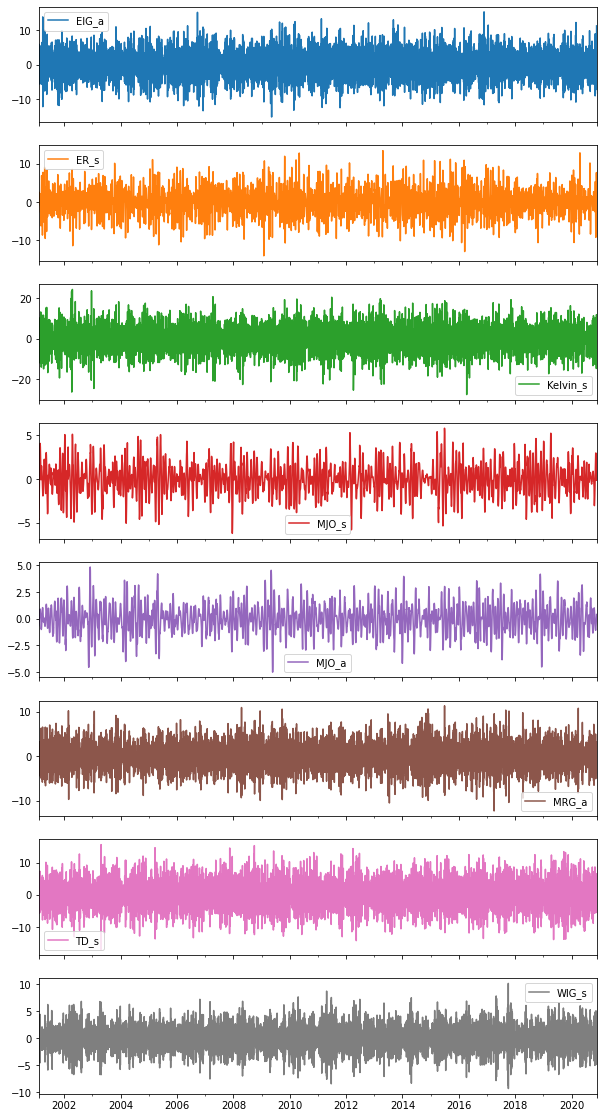

In [15]:
ondas.plot(subplots=True, figsize=(10,20))

In [16]:
print(lat)
print(lon)

[ 15.   12.5  10.    7.5   5.    2.5   0.   -2.5  -5.   -7.5 -10. ]
[-90.  -87.5 -85.  -82.5 -80.  -77.5 -75.  -72.5 -70.  -67.5 -65.  -62.5
 -60.  -57.5 -55.  -52.5 -50.  -47.5 -45.  -42.5 -40. ]


### Cargando Chorros

In [17]:
ruta_chorros = ruta_datos + 'Originales/Chorros/'
files = glob.glob(ruta_chorros+'*')

In [18]:
names_chorros = []
data_chorros  = []

for file in files:
    names_chorros.append(file.split('/')[-1].split('.')[0])
    data_chorros.append(pd.read_csv(file, index_col=0).values)
    
fechas = pd.DatetimeIndex(pd.read_csv(file, index_col=0).index)

chorros = pd.DataFrame(index=fechas, data = np.concatenate(data_chorros, axis=1), columns=names_chorros)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

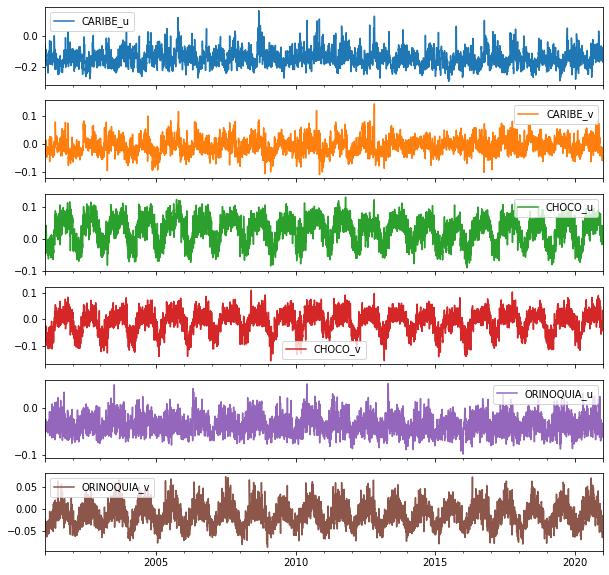

In [19]:
chorros.plot(subplots=True, figsize = (10,10))

array([[<AxesSubplot:xlabel='CARIBE_u', ylabel='CARIBE_u'>,
        <AxesSubplot:xlabel='CARIBE_v', ylabel='CARIBE_u'>,
        <AxesSubplot:xlabel='CHOCO_u', ylabel='CARIBE_u'>,
        <AxesSubplot:xlabel='CHOCO_v', ylabel='CARIBE_u'>,
        <AxesSubplot:xlabel='ORINOQUIA_u', ylabel='CARIBE_u'>,
        <AxesSubplot:xlabel='ORINOQUIA_v', ylabel='CARIBE_u'>],
       [<AxesSubplot:xlabel='CARIBE_u', ylabel='CARIBE_v'>,
        <AxesSubplot:xlabel='CARIBE_v', ylabel='CARIBE_v'>,
        <AxesSubplot:xlabel='CHOCO_u', ylabel='CARIBE_v'>,
        <AxesSubplot:xlabel='CHOCO_v', ylabel='CARIBE_v'>,
        <AxesSubplot:xlabel='ORINOQUIA_u', ylabel='CARIBE_v'>,
        <AxesSubplot:xlabel='ORINOQUIA_v', ylabel='CARIBE_v'>],
       [<AxesSubplot:xlabel='CARIBE_u', ylabel='CHOCO_u'>,
        <AxesSubplot:xlabel='CARIBE_v', ylabel='CHOCO_u'>,
        <AxesSubplot:xlabel='CHOCO_u', ylabel='CHOCO_u'>,
        <AxesSubplot:xlabel='CHOCO_v', ylabel='CHOCO_u'>,
        <AxesSubplot:xlabel='ORINOQU

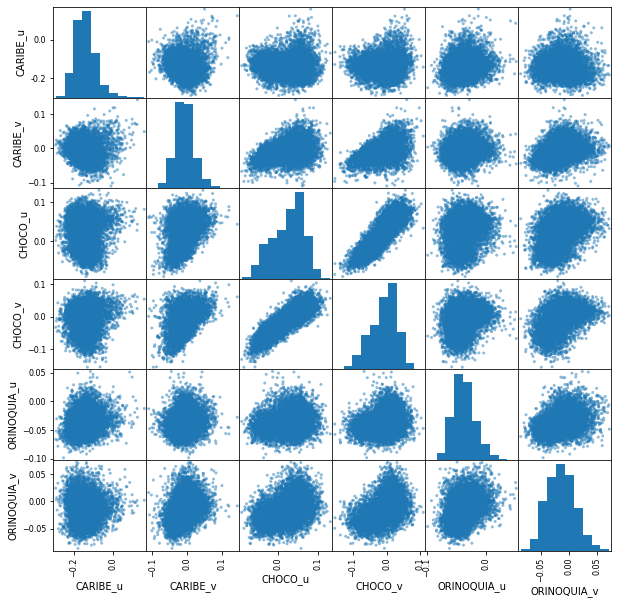

In [20]:
pd.plotting.scatter_matrix(chorros, figsize=(10,10))

array([[<AxesSubplot:xlabel='EIG_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='ER_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='Kelvin_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MJO_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MJO_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MRG_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='TD_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='WIG_s', ylabel='EIG_a'>],
       [<AxesSubplot:xlabel='EIG_a', ylabel='ER_s'>,
        <AxesSubplot:xlabel='ER_s', ylabel='ER_s'>,
        <AxesSubplot:xlabel='Kelvin_s', ylabel='ER_s'>,
        <AxesSubplot:xlabel='MJO_s', ylabel='ER_s'>,
        <AxesSubplot:xlabel='MJO_a', ylabel='ER_s'>,
        <AxesSubplot:xlabel='MRG_a', ylabel='ER_s'>,
        <AxesSubplot:xlabel='TD_s', ylabel='ER_s'>,
        <AxesSubplot:xlabel='WIG_s', ylabel='ER_s'>],
       [<AxesSubplot:xlabel='EIG_a', ylabel='Kelvin_s'>,
        <AxesSubplot:xlabel='ER_s', ylabel='Kelvin_s'>,
        <AxesSubplot:xlabel

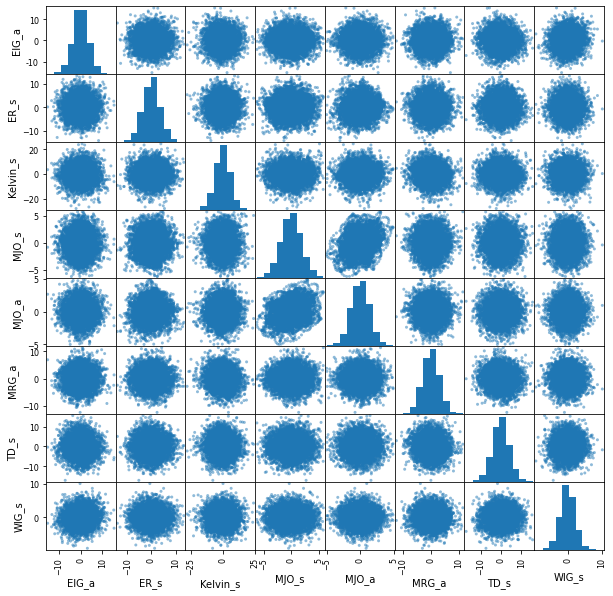

In [21]:
pd.plotting.scatter_matrix(ondas, figsize=(10,10))

In [22]:
ondas_chorros_caudal = pd.concat((ondas,chorros,ppt,caudal), axis=1)

array([[<AxesSubplot:xlabel='EIG_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='ER_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='Kelvin_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MJO_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MJO_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='MRG_a', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='TD_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='WIG_s', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CARIBE_u', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CARIBE_v', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CHOCO_u', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='CHOCO_v', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='ORINOQUIA_u', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='ORINOQUIA_v', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='PPT_ERA5', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='PPT_IMERG', ylabel='EIG_a'>,
        <AxesSubplot:xlabel='Caudal', ylabel='EIG_a'>],
       [<AxesSubplot:xlabel='EIG_a', ylabel='ER_s'

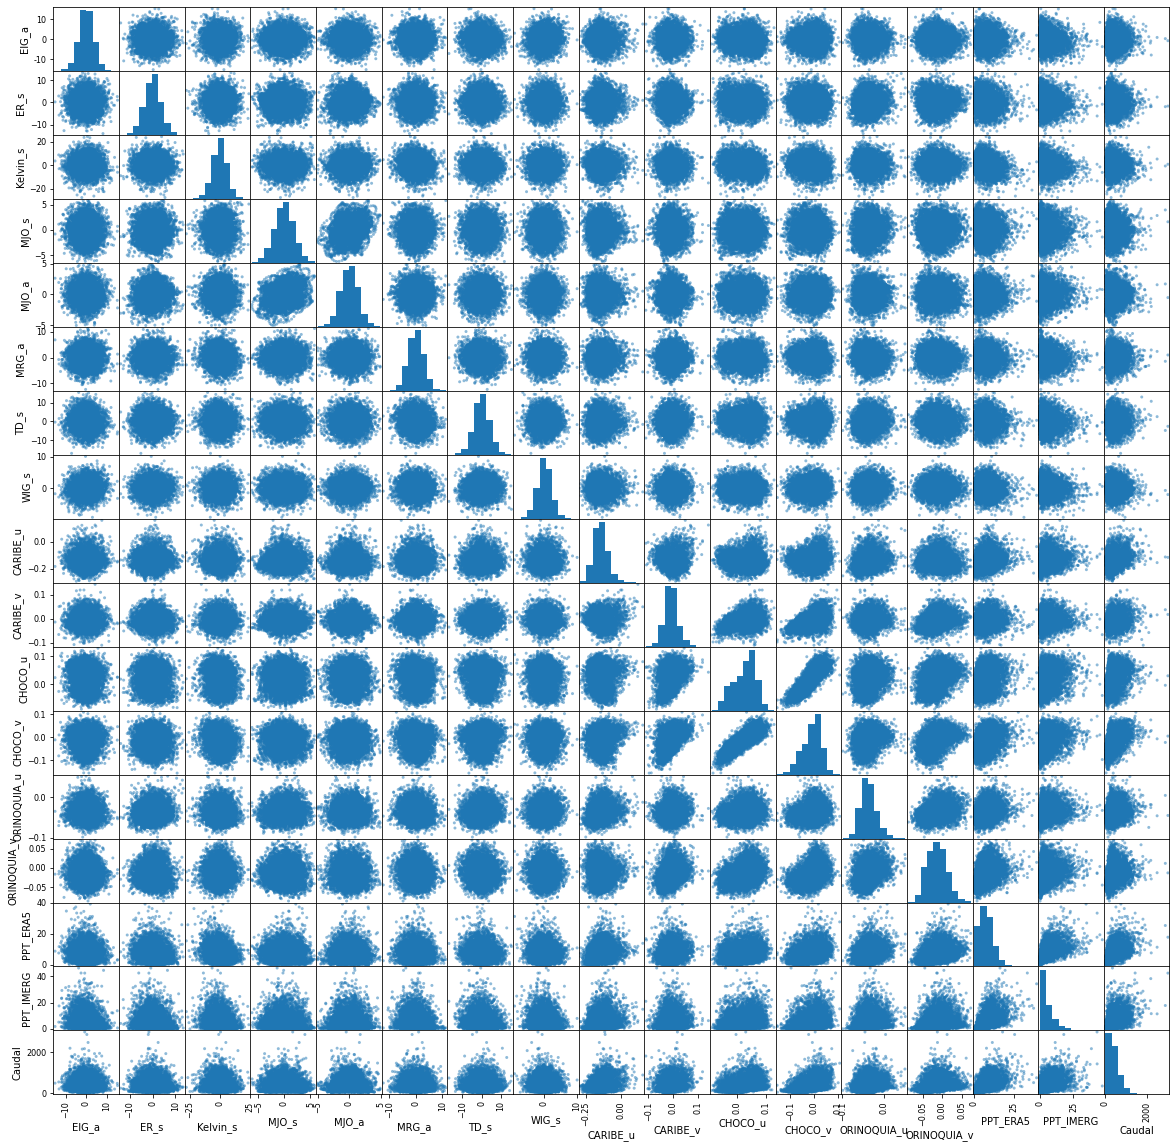

In [23]:
pd.plotting.scatter_matrix(ondas_chorros_caudal, figsize=(20,20))

In [24]:
ondas_chorros_caudal.corr()

,EIG_a,ER_s,Kelvin_s,MJO_s,MJO_a,MRG_a,TD_s,WIG_s,CARIBE_u,CARIBE_v,CHOCO_u,CHOCO_v,ORINOQUIA_u,ORINOQUIA_v,PPT_ERA5,PPT_IMERG,Caudal
EIG_a,1.000000,0.000020,-0.000679,0.000002,0.000427,0.005767,-0.028099,0.087017,-0.004412,0.008573,-0.039694,-0.001461,-0.014824,-0.053753,-0.074670,-0.127102,-0.018328
ER_s,0.000020,1.000000,0.022163,0.009109,-0.004950,0.000974,-0.000016,0.000219,0.021948,-0.029307,-0.045444,-0.029572,0.111668,-0.037242,-0.104437,-0.088731,-0.035514
Kelvin_s,-0.000679,0.022163,1.000000,0.003828,0.000357,-0.080066,0.001848,0.004313,-0.052920,-0.030699,-0.112097,-0.131732,-0.013079,-0.001550,-0.204985,-0.147097,-0.043178
MJO_s,0.000002,0.009109,0.003828,1.000000,0.266950,-0.000872,-0.002815,-0.001534,0.021587,-0.003569,-0.023303,-0.009096,0.061411,-0.015126,-0.013225,-0.029542,-0.023557
MJO_a,0.000427,-0.004950,0.000357,0.266950,1.000000,-0.000023,-0.000025,-0.000376,0.005655,0.007251,0.011936,0.008953,-0.010347,-0.027059,-0.002623,0.014444,-0.002546
MRG_a,0.005767,0.000974,-0.080066,-0.000872,-0.000023,1.000000,-0.055209,-0.000078,0.033208,0.024273,-0.055528,-0.059179,-0.074422,-0.040345,-0.067837,-0.088990,-0.012033
TD_s,-0.028099,-0.000016,0.001848,-0.002815,-0.000025,-0.055209,1.000000,0.035474,0.034150,0.023861,-0.032659,0.049426,0.097128,-0.055244,-0.068307,-0.095084,0.003759
WIG_s,0.087017,0.000219,0.004313,-0.001534,-0.000376,-0.000078,0.035474,1.000000,0.003931,0.004155,-0.020027,-0.002280,0.036172,-0.014947,-0.052573,-0.096423,-0.021047
CARIBE_u,-0.004412,0.021948,-0.052920,0.021587,0.005655,0.033208,0.034150,0.003931,1.000000,-0.043362,-0.010452,0.052846,0.162144,-0.044484,0.189082,0.212015,0.292398
CARIBE_v,0.008573,-0.029307,-0.030699,-0.003569,0.007251,0.024273,0.023861,0.004155,-0.043362,1.000000,0.389117,0.476702,0.140987,0.310650,0.122742,0.085910,0.166375


<AxesSubplot:>

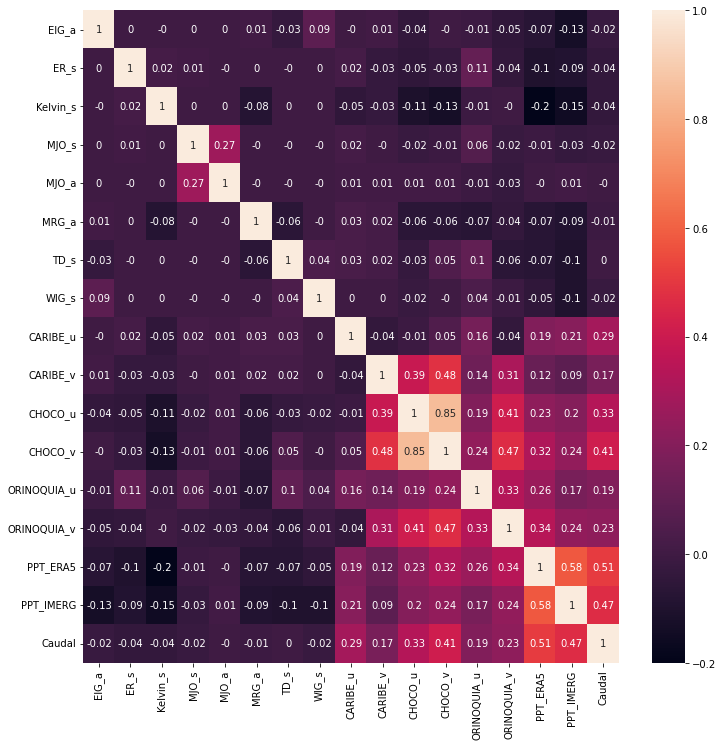

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(ondas_chorros_caudal.corr().round(2), annot=True)

In [26]:
~pd.isna(ondas_chorros_caudal)

,EIG_a,ER_s,Kelvin_s,MJO_s,MJO_a,MRG_a,TD_s,WIG_s,CARIBE_u,CARIBE_v,CHOCO_u,CHOCO_v,ORINOQUIA_u,ORINOQUIA_v,PPT_ERA5,PPT_IMERG,Caudal
2000-01-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2000-01-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2000-01-03,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2000-01-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2000-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-23,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2022-09-24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2022-09-25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2022-09-26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [27]:
ondas_chorros_caudal.to_csv(ruta_datos + 'Datos.csv')